In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
device = torch.device("cuda:0")
print(device)

cuda:0


In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


170499072it [00:09, 18635100.86it/s]                               
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


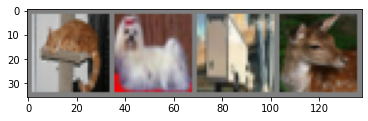

NameError: name 'batch_size' is not defined

In [8]:
def imshow(img):
    img = img/2 + 0.5 #unnormalize image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(batch_size)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d (3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
#TRAIN
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')


[1,  2000] loss: 2.213
[1,  4000] loss: 1.831
[1,  6000] loss: 1.662
[1,  8000] loss: 1.595
[1, 10000] loss: 1.517
[1, 12000] loss: 1.494
[2,  2000] loss: 1.411
[2,  4000] loss: 1.390
[2,  6000] loss: 1.373
[2,  8000] loss: 1.328
[2, 10000] loss: 1.322
[2, 12000] loss: 1.294
Finished Training


In [24]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

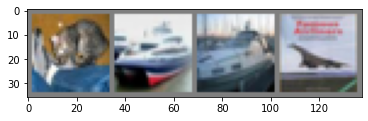

GroundTruth:    cat  ship  ship plane


In [27]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [28]:
#HOW TO LOAD PRETRAINED MODEL THAT HAS BEEN SAVED
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [29]:
outputs = net(images)

In [50]:
_, predicted = torch.max(outputs, 1) #to output the most probable label
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat plane plane  ship


In [35]:
print(list(outputs[1]))

[tensor(5.5097, grad_fn=<UnbindBackward>), tensor(3.4529, grad_fn=<UnbindBackward>), tensor(0.4516, grad_fn=<UnbindBackward>), tensor(-2.6669, grad_fn=<UnbindBackward>), tensor(-1.6725, grad_fn=<UnbindBackward>), tensor(-3.4237, grad_fn=<UnbindBackward>), tensor(-3.1574, grad_fn=<UnbindBackward>), tensor(-3.5761, grad_fn=<UnbindBackward>), tensor(4.4200, grad_fn=<UnbindBackward>), tensor(2.0211, grad_fn=<UnbindBackward>)]


In [49]:
print('Class prediction is: ')
for i in range(4):
    print( 'in image: ',i + 1)
    for j in range(10):
        print('For class: ',classes[j],' value is: ',outputs[i][j])
    print('\n')

Class prediction is: 
in image:  1
For class:  plane  value is:  tensor(-0.2475, grad_fn=<SelectBackward>)
For class:  car  value is:  tensor(-1.9252, grad_fn=<SelectBackward>)
For class:  bird  value is:  tensor(2.0014, grad_fn=<SelectBackward>)
For class:  cat  value is:  tensor(2.5938, grad_fn=<SelectBackward>)
For class:  deer  value is:  tensor(-1.1991, grad_fn=<SelectBackward>)
For class:  dog  value is:  tensor(2.1846, grad_fn=<SelectBackward>)
For class:  frog  value is:  tensor(1.7994, grad_fn=<SelectBackward>)
For class:  horse  value is:  tensor(-1.9729, grad_fn=<SelectBackward>)
For class:  ship  value is:  tensor(-0.1675, grad_fn=<SelectBackward>)
For class:  truck  value is:  tensor(-1.9682, grad_fn=<SelectBackward>)


in image:  2
For class:  plane  value is:  tensor(5.5097, grad_fn=<SelectBackward>)
For class:  car  value is:  tensor(3.4529, grad_fn=<SelectBackward>)
For class:  bird  value is:  tensor(0.4516, grad_fn=<SelectBackward>)
For class:  cat  value is:  tensor

In [51]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 51 %


In [52]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 72 %
Accuracy of  bird : 62 %
Accuracy of   cat : 10 %
Accuracy of  deer : 22 %
Accuracy of   dog : 46 %
Accuracy of  frog : 82 %
Accuracy of horse : 45 %
Accuracy of  ship : 69 %
Accuracy of truck : 42 %


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [54]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [55]:
inputs, labels = data[0].to(device), data[1].to(device)